In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [9]:
conn = sqlite3.connect('sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [10]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [11]:
df.shape

(16044, 10)

In [12]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


## Numerical Analysis and visualization

In [13]:
df['film_rental_rate'].describe()

count    16044.000000
mean         2.942630
std          1.649678
min          0.990000
25%          0.990000
50%          2.990000
75%          4.990000
max          4.990000
Name: film_rental_rate, dtype: float64

In [14]:
df['film_rental_rate'].mean()

2.9426302667662574

In [15]:
df['film_rental_rate'].median()

2.99

<AxesSubplot:>

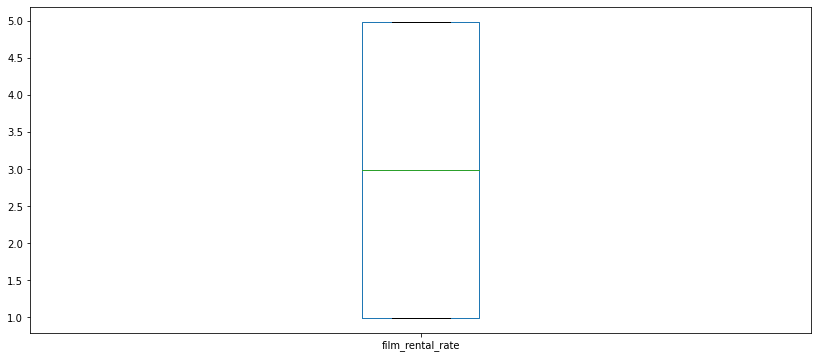

In [16]:
df['film_rental_rate'].plot(kind='box', figsize=(14,6))

<AxesSubplot:ylabel='Density'>

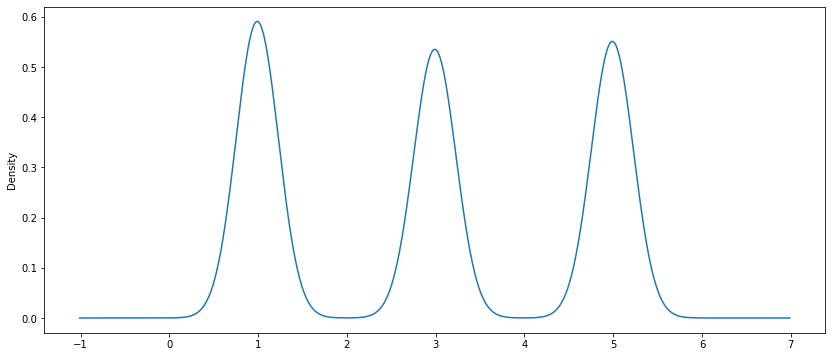

In [17]:
df['film_rental_rate'].plot(kind='density', figsize=(14,6))

Text(0, 0.5, "['Number of Rentals']")

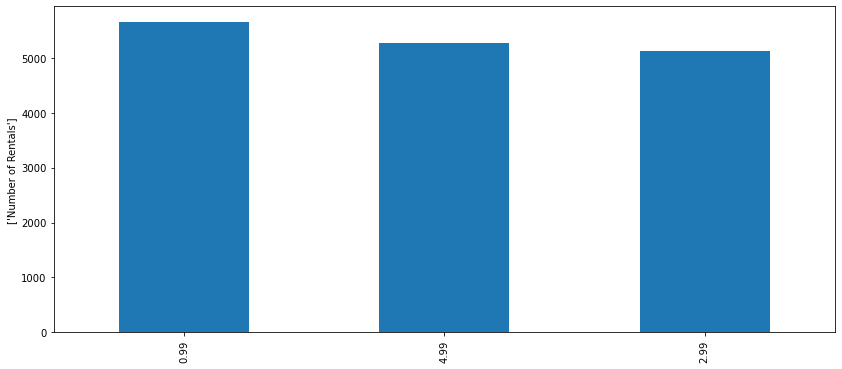

In [19]:
ax = df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel(['Number of Rentals'])

## Categorical Analysis and visualization

In [21]:
df['rental_store_city'].value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

<AxesSubplot:>

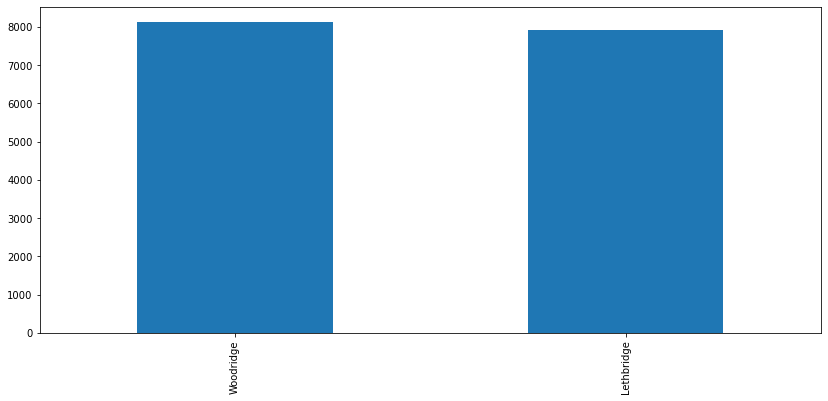

In [22]:
df['rental_store_city'].value_counts().plot(kind='bar', figsize=(14,6))

<AxesSubplot:ylabel='rental_store_city'>

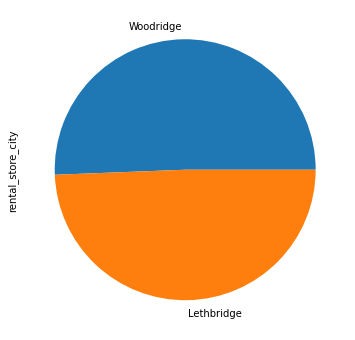

In [24]:
df['rental_store_city'].value_counts().plot(kind='pie', figsize=(6,6))

## Add and calculate a new rental_rate_return column

### We want to know the rental rate of return of each film. To do that well use this formula 

### rental_gain_return = film_rental_rate / film_replacement_cost * 100

In [25]:
df['rental_gain_return'] = df['film_rental_rate'] / df['film_replacement_cost'] * 100
df['rental_gain_return'].head()

rental_id
1    13.597090
2    17.598587
3    19.946631
4     4.502046
5     9.969990
Name: rental_gain_return, dtype: float64

<AxesSubplot:ylabel='Density'>

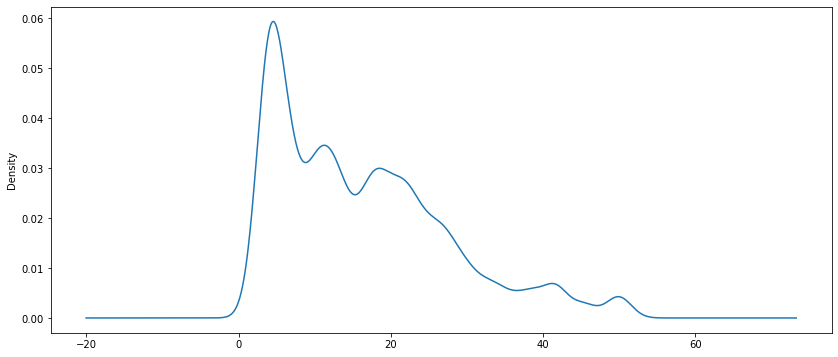

In [26]:
df['rental_gain_return'].plot(kind='density', figsize=(14,6))

In [30]:
df['rental_gain_return'].mean()

16.343824010240393

In [31]:
df['rental_gain_return'].median()

13.597089586175537

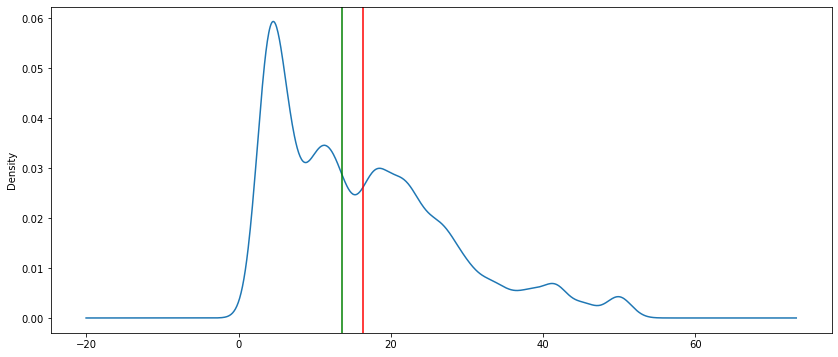

In [32]:
ax = df['rental_gain_return'].plot(kind='density', figsize=(14,6))
ax.axvline(df['rental_gain_return'].mean(), color='red')
ax.axvline(df['rental_gain_return'].median(), color='green')